In [55]:
from astropy.io import fits
from astropy.table import Table
import astropy.table as table

import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D


from astropy.wcs import WCS
from astropy.wcs.utils import skycoord_to_pixel
from astropy.utils.data import get_pkg_data_filename

from astropy.coordinates import SkyCoord
%matplotlib inline

import string
#Notice: in order to save figures as a .jpg file you need the module Pillow: !pip install pillow

In [56]:
filename = 'C:\\users\\sahal\\2018TrinaryWork\\TrinaryStarSearch\\Data\\ch4_merged_clean.fits'
hdu = fits.open(filename)[0]
hdu.header['CTYPE1']='RA---TAN-SIP'
hdu.header['CTYPE2']='DEC--TAN-SIP'
wcs = WCS(hdu.header)

gaiaHDU = fits.open('C://users//sahal//2018TrinaryWork//TrinaryStarSearch//Data/gaiadr2_OrionTables.fits')
gTab=Table(gaiaHDU[1].data)

gaiaConfHDU = fits.open('c:\\users\\sahal\\2018TrinaryWork\\TrinaryStarSearch\\Data\\conf_in_gaiadr2_oriontables.fits')
gaiaConfTab = Table(gaiaConfHDU[1].data)
Mg_all = np.array([G + 5 - 5*(np.log10(1000/p)) for G, p in zip(gaiaConfTab['phot_g_mean_mag'], gaiaConfTab['parallax'])])
ii=[]
for i in range(len(gaiaConfTab)):
    if( (Mg_all[i]<2.46*(gaiaConfTab['bp_rp'][i])+2.76 and .3<(gaiaConfTab['bp_rp'][i])<1.8)
       or (Mg_all[i]<2.8*(gaiaConfTab['bp_rp'][i])+2.16 and 1.8<(gaiaConfTab['bp_rp'][i]))):
        ii.append(i)
gaiaConfTab = gaiaConfTab[ii]

confTab = Table.read('C://users//sahal//2018TrinaryWork//TrinaryStarSearch//Data/oriona-allmembers.fits')

wTrap = Table.read('C://users//sahal//2018TrinaryWork//TrinaryStarSearch//data/wTrap.fits')
wOB = Table.read('C://users//sahal//2018TrinaryWork//TrinaryStarSearch//data/wOB.fits')
wOther = Table.read('C://users//sahal//2018TrinaryWork//TrinaryStarSearch//data/wElse.fits')


OBTab = Table.read('C://users//sahal//2018TrinaryWork//TrinaryStarSearch//data/ob_ori.fits')


thOriA = SkyCoord('5h35m15.8290940s','-05d23m14.153141s', frame = 'icrs')
thOriB = SkyCoord('05h35m16.112s','-05d23 m06.89s', frame = 'icrs')
thOriC = SkyCoord('05h35m16.46375s', '-05d23m22.8486s', frame = 'icrs')
thOriD = SkyCoord('05h35m17.19248s', '-05d23m15.5661s', frame = 'icrs')
traptab = Table([[thOriA.ra.deg,thOriB.ra.deg, thOriC.ra.deg, thOriD.ra.deg],
                [thOriA.dec.deg, thOriB.dec.deg,thOriC.dec.deg, thOriD.dec.deg],
                [1.81,-.9,-4.13,-7.11],[-1.62,.1,6.82,8.29]],
               names =('ra','dec','pmra','pmdec'))

In [57]:
# def bright():
#     global blue
#     blue = np.array([68,119,170])
#     global cyan
#     cyan = np.array([102,204,238])
#     global green
#     green = np.array([34,136,51])
#     global yellow
#     yellow = np.array([204,187,68])
#     global red
#     red = np.array([238,102,119])
#     global purple
#     purple = np.array([170, 51,119])
#     global grey
#     grey = np.array([187, 187, 187])

#     blue = blue/np.linalg.norm(blue)
#     cyan = cyan/np.linalg.norm(cyan)
#     green = green/np.linalg.norm(green)
#     yellow = yellow/np.linalg.norm(yellow)
#     red = red/np.linalg.norm(red)
#     purple = purple/np.linalg.norm(purple)
#     grey = grey/np.linalg.norm(grey)
#     return(blue, cyan, green, yellow, red, purple, grey)

def bright():
    global blue
    blue = '#004488'
    global red 
    red = '#BB5566'
    global yellow
    yellow = '#DDAA33'

def vibrant():
    global blue
    blue = '#0077BB'
    global cyan
    cyan = '#33BBEE'
    global teal
    teal = '#009988'
    global orange
    orange = '#EE7733'
    global red
    red = '#CC3311'
    global magenta
    magenta = '#EE3377'
    global grey
    grey = '#BBBBBB'

def highcontrast():
    global yellow
    yellow = '#DDAA33'
    global blue
    blue = '#004488'
    global red 
    red = '#BB5566'


In [58]:
#6/19 Trying to identify interactions
from matplotlib import path
def contains(verts, xpoints, ypoints):
    p = path.Path(verts)
    bools = p.contains_points(np.array([xpoints, ypoints]).T)
    return bools

In [59]:
plTab = Table(fits.open('c:/users/sahal/desktop/master_revised.fits')[1].data)
TRAP = plTab[np.where(np.isin(plTab['figure_label'], list('abcdefghi')))[0]]
OB = plTab[np.where(np.isin(plTab['figure_label'], list('jklmn')))[0]]
VIS = plTab[np.where(np.isin(plTab['figure_label'], list('opqrstu')))[0]]
REM = plTab[np.where(np.isin(plTab['figure_label'], list('vwxyz')))[0]]

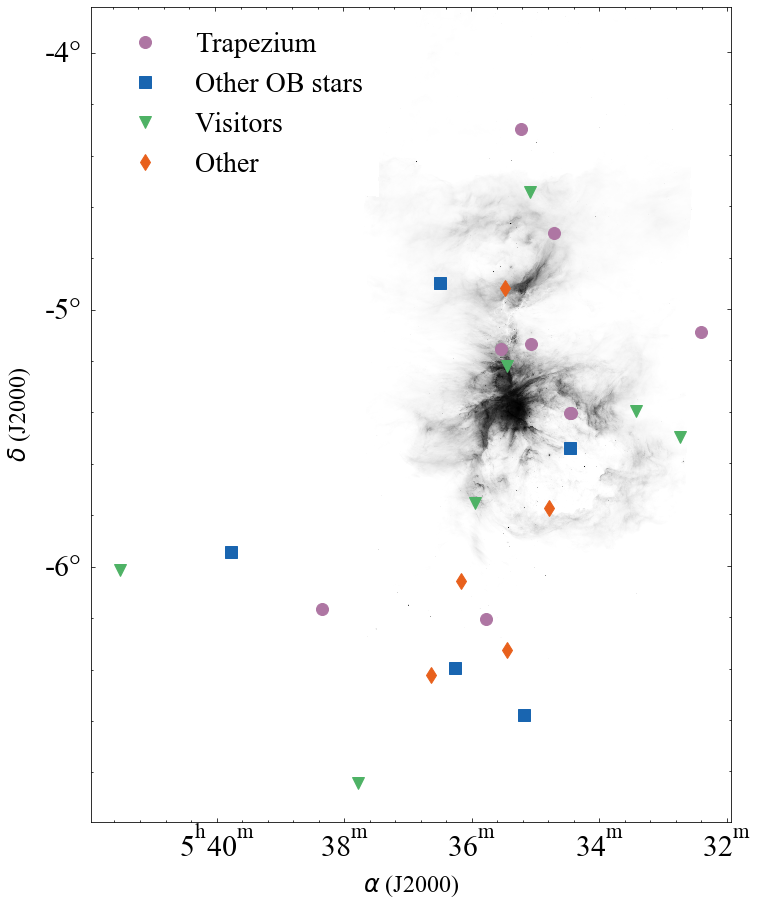

In [68]:
highcontrast()
notrap=[ 1, 3,  4,  5,  6, 11, 12]

# wTrapStars = SkyCoord(wTrap['ra'], wTrap['dec'], unit = 'deg', frame = 'icrs')
# wOBStars = SkyCoord(wOB['ra'], wOB['dec'], unit = 'deg', frame = 'icrs')[notrap]
# wOtherStars = SkyCoord(wOther['ra'], wOther['dec'], unit = 'deg', frame = 'icrs')

T=SkyCoord(TRAP['ra'], TRAP['dec'], unit = 'deg', frame = 'icrs')
O=SkyCoord(OB['ra'], OB['dec'], unit = 'deg', frame = 'icrs')
V=SkyCoord(VIS['ra'], VIS['dec'], unit = 'deg', frame = 'icrs')
R=SkyCoord(REM['ra'], REM['dec'], unit = 'deg', frame = 'icrs')

params = {
    'axes.titlesize' : 24,
    'axes.labelsize' : 24,
    #lines.linewidth : 3,
    #lines.markersize : 10,
    'xtick.labelsize' : 30,
    'ytick.labelsize' : 30,
    
    'xtick.direction' : 'in',
    'xtick.major.size' : 4,
    'xtick.major.width' : 0.5,
    'xtick.minor.size' : 2,
    'xtick.minor.width' : 0.5,
    'xtick.minor.visible' :   True,
    'xtick.top' : True,

    # Set y axis
    'ytick.direction' : 'in',
    'ytick.major.size' : 4,
    'ytick.major.width' : 0.5,
    'ytick.minor.size' : 2,
    'ytick.minor.width' : 0.5,
    'ytick.minor.visible' :   True,
    'ytick.right' : True,
    
    'font.serif' : 'Times New Roman',
    'font.family' : 'serif'
   }
matplotlib.rcParams.update(params)

matplotlib.rcParams['xtick.major.pad']='10'
matplotlib.rcParams['ytick.major.pad']='10'

fig  = plt.figure(figsize=(15, 15))
ax = plt.subplot(projection = wcs)
ax.imshow(np.arctan(0.0001*(hdu.data-np.median(hdu.data))), origin='lower',cmap='binary',vmin=0)
# print(fig.get_size_inches())a

w=1
a,=ax.plot(T.ra, T.dec, 'o', transform = ax.get_transform('icrs'), label = 'Trapezium',linewidth = w,color = '#AE76A3', markersize = 12)
b,=ax.plot(O.ra, O.dec,'s',  transform = ax.get_transform('icrs'), label = 'Other OB stars',linewidth = w, color = '#1965B0' ,markersize = 12)
c,=ax.plot(V.ra, V.dec, 'v', transform = ax.get_transform('icrs'), label = 'Visitors',linewidth = w, color = '#4EB265' ,markersize = 12)
d,=ax.plot(R.ra, R.dec, 'd', transform = ax.get_transform('icrs'), label = 'Other',linewidth = w, color = '#E8601C' ,markersize = 12)

plt.legend(handles = [a,b,c,d], loc=2, frameon=False, prop={'size': 28})
ax.set_xlabel('$\\alpha$ (J2000)')
ax.set_ylabel('$\\delta$ (J2000)')   
# ax.xticks.labelpad = 30
plt.savefig('c:\\users\\sahal\\desktop\\research\\figures\\field.pdf',bbox_inches='tight')


plt.show()
#What I need to do is examine the trapezium sources and figure out if there's any that are more likely to interact with an OB star first

In [61]:
params = {
    'axes.titlesize' : 30,
    'axes.labelsize' : 50,
#     lines.linewidth : 6,
    #lines.markersize : 10,
    'xtick.labelsize' : 40,
    'ytick.labelsize' : 40
    
#     'figure.figsize' : 40, 40
   }
matplotlib.rcParams.update(params)

matplotlib.rcParams['xtick.major.pad']='12'
matplotlib.rcParams['ytick.major.pad']='12'

#### This is nice and all, but I want them to connect back to a specific source...

In [62]:
#This function translates right ascension and declination into pixels for our given WCS
def transf(ra, dec):
    pos = np.array([ra, dec])
    #mat = np.array([[-0.000339385442203,0.0],[0.0, 0.000339385442203]])
    mat = np.array([[1/-0.000339385442203,0.0],[0.0, 1/0.000339385442203]])
    crval = np.array([83.4643019345, -3.87517570367])
    vec = +pos -crval
    crpix = np.array([2850.0,  7809.0])

    return(np.matmul(mat, vec)+crpix)

def dist(xx1, yy1, xx2, yy2):
    return np.sqrt((xx2-xx1)**2+(yy2-yy1)**2)

In [63]:
def box(coord, mult = 1.5):
    bRa=coord[0].ra
    pRa=coord[1].ra
    bDec = coord[0].dec
    pDec = coord[1].dec
    
    bRa = float(bRa.to_string(decimal = True))
    pRa = float(pRa.to_string(decimal = True))
    bDec = float(bDec.to_string(decimal = True))
    pDec = float(pDec.to_string(decimal = True))
    
    midRa, midDec = ((bRa+pRa)/2, (bDec+pDec)/2)

    
    constraint = np.max([dist(bRa,bDec, midRa, midDec),dist(pRa,pDec, midRa,midDec)])*mult
#     constraint = np.max([np.abs(np.abs(bRa) - np.abs(midRa)),np.abs(np.abs(pRa) - np.abs(midRa)),np.abs(np.abs(bDec) - np.abs(midDec)),
#                          np.abs(np.abs(pDec) - np.abs(midDec))])
    #constraint = 1
    
    lows = transf(midRa+constraint, midDec - constraint)#I THINK this should be +, -; not -, +; for the RA specifically
    highs = transf(midRa-constraint, midDec + constraint)
    
    xx = (lows[0], highs[0])
    yy = (lows[1], highs[1])
    #print(transf(midRa, midDec))
    #print(yy)
#     print('center', midRa, midDec)
#     print('lowbound', midRa + constraint, midDec-constraint)
#     print('highbound', midRa-constraint, midDec + constraint)
    return (xx, yy)

In [10]:
trapDict = {2:[1,'a'],3:[2,'b'],1:[3,'c'],0:[4,'d'],4:[5,'e'],5:[6,'f']}
trapDict[0][0]

4

In [11]:
b='abcdefghijklmnopqrstvwxyuz'
nn = list(range(26))
diction = {}
for l in range(len(b)):
    diction[b[l]]=nn[l]

In [12]:
diction

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'v': 20,
 'w': 21,
 'x': 22,
 'y': 23,
 'u': 24,
 'z': 25}

In [13]:
ORDER = 'cdbaefiokghlmyuzntjsprwqvx'
real = 'abcdefghijklmnopqrstuvwxyz'
numbers = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,15,16,17,18,19,20,21,22,23,24,25]
plotsortdict={}
for num in range(len(ORDER)):
    item = ORDER[num]
    plotsortdict[diction[item]]=[numbers[num],real[num]]

In [14]:
print(plotsortdict)
print(trapDict)

{2: [1, 'a'], 3: [2, 'b'], 1: [3, 'c'], 0: [4, 'd'], 4: [5, 'e'], 5: [6, 'f'], 8: [7, 'g'], 14: [8, 'h'], 10: [9, 'i'], 6: [10, 'j'], 7: [11, 'k'], 11: [12, 'l'], 12: [13, 'm'], 23: [14, 'n'], 24: [15, 'o'], 25: [15, 'p'], 13: [16, 'q'], 19: [17, 'r'], 9: [18, 's'], 18: [19, 't'], 15: [20, 'u'], 17: [21, 'v'], 21: [22, 'w'], 16: [23, 'x'], 20: [24, 'y'], 22: [25, 'z']}
{2: [1, 'a'], 3: [2, 'b'], 1: [3, 'c'], 0: [4, 'd'], 4: [5, 'e'], 5: [6, 'f']}


# Trapezium Interactions Here

d
c
a
b
e
f


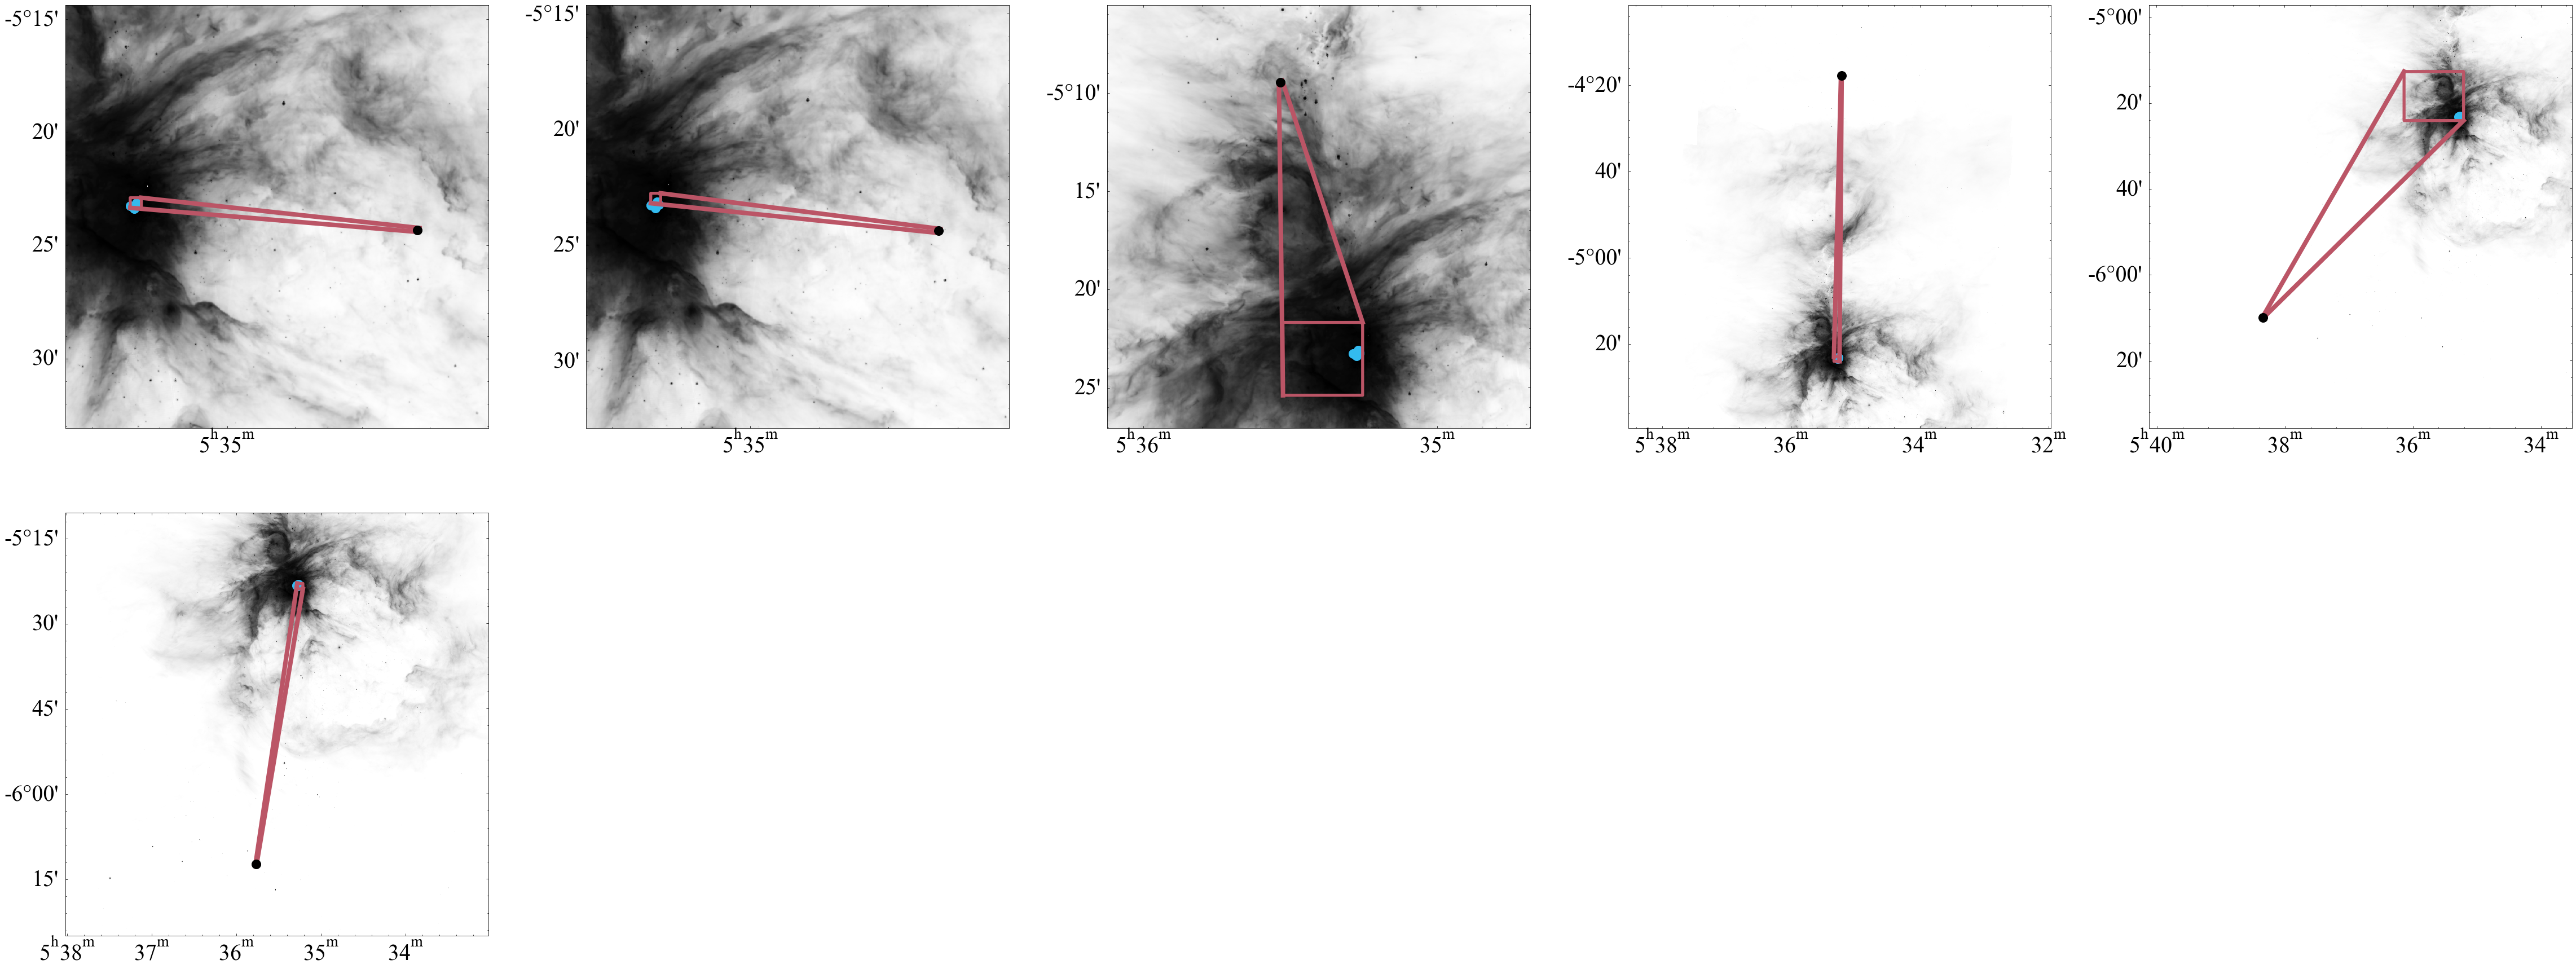

In [42]:
k = 8
vibrant()
bright()
#colors
c1=red
c2 = blue
c3 = '#33BBEE'
c4 = yellow #'#AE76E3'

REORDER = [2,3,1,0,4,5]

# fig, axs = plt.subplots(figsize=(80, 80), nrows = 5, ncols = 5)
fig = plt.figure(figsize=(80,80))

def conePlotTR(inTab, ra_stat=False, dec_stat=False, offsetMultiplier = 5, times=np.ones(6)):
    arc = 1/3600 #arcsecond in degrees
    cvt = arc/1000 #miliarcseconds to deg
    pmraAvg = np.mean(gaiaConfTab['pmra'])
    pmdecAvg = np.mean(gaiaConfTab['pmdec'])
    #gets the average proper motion of all stars confirmed and with gaia data too
    
    pmra_corr = -(inTab['pmra']-pmraAvg)*cvt
    pmdec_corr = -(inTab['pmdec']-pmdecAvg)*cvt
    
    absPmra = np.abs(pmra_corr)
    absPmdec = np.abs(pmdec_corr)
    signPmra = np.sign(pmra_corr)
    signPmdec = np.sign(pmdec_corr)
    
    maxPmra = absPmra - inTab['pmra_err']*cvt
    maxPmdec = absPmdec + inTab['pmdec_err']*cvt

    minPmra = absPmra + inTab['pmra_err']*cvt
    minPmdec = absPmdec - inTab['pmdec_err']*cvt
    
    optMaxPmra = maxPmra * signPmra 
    optMaxPmdec = maxPmdec * signPmdec
    
    optMinPmra = minPmra * signPmra
    optMinPmdec = minPmdec * signPmdec   
    
    raUpOffset = inTab['ra'] - offsetMultiplier * arc * signPmra
    decUpOffset = inTab['dec'] + offsetMultiplier * arc * signPmdec
    
    raDownOffset = inTab['ra'] + offsetMultiplier * arc * signPmra
    decDownOffset = inTab['dec'] - offsetMultiplier * arc * signPmdec
    #effectively, this draws a box around the initial position and selects the corners with the widest spread
    
    trap_ra = float(ra_stat[0].to_string(decimal = True))
    trap_dec = float(dec_stat[0].to_string(decimal = True))
    
    #The proper motion alone doesn't cut it, what happens when I average?
    pmMag = np.sqrt(inTab['pmra']**2+inTab['pmdec']**2)*cvt
    #all of this is extra

    d = np.sqrt((inTab['ra'] - trap_ra)**2+(inTab['dec']-trap_dec)**2)
    
    #tt = 1000000#myr timestep
    tt = d / pmMag
    
    tt = tt * times

    
    projRaUp  = raUpOffset + tt * optMaxPmra
    projDecUp  = decUpOffset + tt * optMaxPmdec
    projRaDown  = raDownOffset + tt * optMinPmra
    projDecDown = decDownOffset + tt * optMinPmdec    
        
    Ura = np.zeros(2*len(inTab))
    Ura[0::2]=raUpOffset
    Ura[1::2]=projRaUp
    Dra = np.zeros(2*len(inTab))
    Dra[0::2]=raDownOffset
    Dra[1::2]=projRaDown

    Udec = np.zeros(2*len(inTab))
    Udec[0::2]=decUpOffset
    Udec[1::2]=projDecUp
    Ddec = np.zeros(2*len(inTab))
    Ddec[0::2]=decDownOffset
    Ddec[1::2]=projDecDown
    
    #These are organized where all even indices are base
    #all odd indices are projected back
    UP = SkyCoord(Ura, Udec, unit = 'deg', frame = 'icrs')
    DOWN = SkyCoord(Dra, Ddec,unit = 'deg', frame = 'icrs')
    
    if not ra_stat == False:
        stat = SkyCoord(ra_stat,dec_stat, unit = 'deg', frame = 'icrs')
    
    #make a box/cap
    RAcap = np.zeros(5 * len(inTab))
    RAcap[0::5]= projRaUp
    RAcap[1::5]= projRaUp
    RAcap[2::5] = projRaDown
    RAcap[3::5] = projRaDown
    RAcap[4::5] = RAcap[0::5]
    
    
    DECcap = np.zeros(5 * len(inTab))
    DECcap[0::5]= projDecUp
    DECcap[1::5]= projDecDown
    DECcap[2::5] = projDecDown
    DECcap[3::5] = projDecUp
    DECcap[4::5] = DECcap[0::5]

    cap = SkyCoord(RAcap, DECcap, unit = 'deg', frame = 'icrs')
    
    strRa = np.zeros(2 * len(inTab))
    strRa[0::2] = inTab['ra']
    strRa[1::2]= trap_ra
    strDec = np.zeros(2 * len(inTab))
    strDec[0::2] = inTab['dec']
    strDec[1::2]= trap_dec    
    straight = SkyCoord(strRa, strDec, unit = 'deg', frame = 'icrs')
    
    ob = SkyCoord(OBTab['ra'], OBTab['dec'], unit = 'deg', frame = 'icrs')

    for itr in range(len(inTab)):
        let = plotsortdict[itr][1]
        print(let)
        NUM = plotsortdict[itr][0]
        
        posx, posy = (itr // 5, itr % 5)
        I = (posx, posy)
        II = (5, 5, NUM)
        anchor = 2 * itr
        off = anchor + 2

        
        axs = fig.add_subplot(*II, projection=wcs)
        axs.imshow(np.arctan(0.0001*(hdu.data-np.median(hdu.data))), origin='lower',cmap='binary',vmin=0)
        
        capAnchor = 5 * itr
        capOff = capAnchor + 5
        #print(capAnchor, capOff)
        
#         axs.plot(cap[capAnchor:capOff].ra, cap[capAnchor:capOff].dec,transform = ax.get_transform('icrs'), color =orange, linewidth =k)    
        
        if not ra_stat == False:
            axs.plot(stat.ra, stat.dec, 'o', transform = axs.get_transform('icrs'), color = c2, markersize = 16)
            
        #ax.plot(ob.ra, ob.dec,'.', transform = ax.get_transform('icrs'))
        
        #xx, yy = box(UP[anchor:off])
        xx, yy = box(straight[anchor:off])
       # print(straight[anchor:off])
        axs.set_xlim(xx)
        axs.set_ylim(yy)
        
        #This should correct axes and make them fit better
        r=axs.coords[0]
        d=axs.coords[1]
        r.set_major_formatter('hh:mm')
        d.set_major_formatter('dd:mm')
        r.set_axislabel('', minpad=.4)
        d.set_axislabel('', minpad=-.4)
        
        if not ra_stat == False:
            axs.plot(stat.ra, stat.dec, 'o', transform = axs.get_transform('icrs'), color = c3, markersize = 16)
            
        axs.plot(cap[capAnchor:capOff].ra, cap[capAnchor:capOff].dec,transform = axs.get_transform('icrs'), color =c1, linewidth =k/1.5)
        axs.plot(UP[anchor:off].ra,UP[anchor:off].dec, transform = axs.get_transform('icrs'), color = c1, linewidth = k)
        axs.plot(DOWN[anchor:off].ra, DOWN[anchor:off].dec, transform = axs.get_transform('icrs'), color = c1, linewidth = k)
        
        #plt.plot(straight[anchor].ra, straight[anchor].dec, marker = 'o', transform = ax.get_transform('icrs'),fillstyle = 'none', color = 'k', linewidth = k*8)#plots an open point
        plt.plot(straight[anchor].ra, straight[anchor].dec, 'o', markersize =16, transform = axs.get_transform('icrs'), color = 'k')#plots an open point
#         axs.plot(stat.ra,stat.dec, transform=axs.get_transform('icrs'), color = c3, )
        
#         let = string.ascii_lowercase[itr]
        
#         axs.set_title(' ' + let, loc = 'left', fontsize = 52, pad = -52, color = blue)
#         axs.set_xlabel('RA (J2000)')
#         ax.set_ylabel('DEC (J2000)')        
        
        zerx = xx[0]
        zery = yy[0]
        time = tt[itr]
#         axs.annotate('-'+str((round(time/1000000, 3)))+'Myr', (.01,.01), xycoords = 'axes fraction', fontsize = 42, color = blue)
        
        picname = 'c:\\users\\sahal\desktop\\research\\figures\\plot_'+let+'.eps'
#         plt.savefig(picname, bbox_inches = 'tight', bbox_extra_artist = ['xlabel', 'ylabel'])
#         allFigs.append(ax)
#         plt.show()

        
tlist = np.array([1,1,.85,.88,1.07,1.033])
conePlotTR(wTrap, [thOriA.ra, thOriB.ra, thOriC.ra, thOriD.ra], [thOriA.dec, thOriB.dec, thOriC.dec, thOriD.dec], times = tlist)

In [43]:
LABELS = []
SOURCEIDS = []
for i in range(len(wTrap['source_id'])):
    source_id = wTrap['source_id'][i]
    source_label = plotsortdict[i+0][1]
    print(source_id,source_label)
    LABELS.append(source_label)
    SOURCEIDS.append(source_id)

3209653627514662528 d
3209528081326372864 c
3209424108758593536 a
3209424108758593408 b
3016971567730386432 e
3017166907140904320 f


In [44]:
long = list('opqrstuyz')
def longCoord(t):
#     long = list('opqrstuy')
    arc = 1/3600 #arcsecond in degrees
    cvt = arc/1000 #miliarcseconds to deg
    pmraAvg = np.mean(gaiaConfTab['pmra'])
    pmdecAvg = np.mean(gaiaConfTab['pmdec'])

    oncOnly = Table(fits.open('c:/users/sahal/desktop/Revised figures/ONC.fits')[1].data)
    pmraAvg = np.mean(oncOnly['VRA'])
    pmdecAvg = np.mean(oncOnly['VDE'])

    regions = Table(fits.open('c:/users/sahal/desktop/Revised figures/PMtab.fits')[1].data)
    regRa = np.zeros(2 * len(regions))
    regRa[0::2] = regions['RAJ2000']
    regRa[1::2]= regions['RAJ2000']-t* (regions['VRA']-pmraAvg)*cvt
    regDec = np.zeros(2 * len(regions))
    regDec[0::2] = regions['DEJ2000']
    regDec[1::2]= regions['DEJ2000']-t*(regions['VDE']-pmdecAvg)*cvt
    regionMotion = SkyCoord(regRa, regDec, unit = 'deg', frame = 'icrs') 
    return regionMotion

# OB Interactions Here

In [45]:
trpINOB=[0, 2, 7, 8, 9, 10]
otherInds = np.delete(np.arange(len(wOB)), trpINOB)
print(otherInds)

def conePlotOB(inTab, ra_stat=False, dec_stat=False, offsetMultiplier = 5, tmult = np.ones(len(otherInds))):
    arc = 1/3600 #arcsecond in degrees
    cvt = arc/1000 #miliarcseconds to deg
    pmraAvg = np.mean(gaiaConfTab['pmra'])
    pmdecAvg = np.mean(gaiaConfTab['pmdec'])
    #gets the average proper motion of all stars confirmed and with gaia data too
    
    pmra_corr = -(inTab['pmra']-pmraAvg)*cvt
    pmdec_corr = -(inTab['pmdec']-pmdecAvg)*cvt
    
    absPmra = np.abs(pmra_corr)
    absPmdec = np.abs(pmdec_corr)
    signPmra = np.sign(pmra_corr)
    signPmdec = np.sign(pmdec_corr)
    
    maxPmra = absPmra - inTab['pmra_err']*cvt
    maxPmdec = absPmdec + inTab['pmdec_err']*cvt

    minPmra = absPmra + inTab['pmra_err']*cvt
    minPmdec = absPmdec - inTab['pmdec_err']*cvt
    
    optMaxPmra = maxPmra * signPmra 
    optMaxPmdec = maxPmdec * signPmdec
    
    optMinPmra = minPmra * signPmra
    optMinPmdec = minPmdec * signPmdec   
    
    raUpOffset = inTab['ra'] - offsetMultiplier * arc * signPmra
    decUpOffset = inTab['dec'] + offsetMultiplier * arc * signPmdec
    
    raDownOffset = inTab['ra'] + offsetMultiplier * arc * signPmra
    decDownOffset = inTab['dec'] - offsetMultiplier * arc * signPmdec
    #effectively, this draws a box around the initial position and selects the corners with the widest spread
    
    #trap_ra = float(ra_stat[0].to_string(decimal = True))
    #trap_dec = float(dec_stat[0].to_string(decimal = True))
    
    #pmMag = np.sqrt(inTab['pmra']**2+inTab['pmdec']**2)*cvt
    #d = np.sqrt((inTab['ra'] - trap_ra)**2+(inTab['dec']-trap_dec)**2)
    
    tt = 1000000 * tmult#myr timestep
    #tt = d / pmMag

    
    projRaUp  = raUpOffset + tt * optMaxPmra
    projDecUp  = decUpOffset + tt * optMaxPmdec
    projRaDown  = raDownOffset + tt * optMinPmra
    projDecDown = decDownOffset + tt * optMinPmdec    
        
    Ura = np.zeros(2*len(inTab))
    Ura[0::2]=raUpOffset
    Ura[1::2]=projRaUp
    Dra = np.zeros(2*len(inTab))
    Dra[0::2]=raDownOffset
    Dra[1::2]=projRaDown

    Udec = np.zeros(2*len(inTab))
    Udec[0::2]=decUpOffset
    Udec[1::2]=projDecUp
    Ddec = np.zeros(2*len(inTab))
    Ddec[0::2]=decDownOffset
    Ddec[1::2]=projDecDown
    
    #These are organized where all even indices are base
    #all odd indices are projected back
    UP = SkyCoord(Ura, Udec, unit = 'deg', frame = 'icrs')
    DOWN = SkyCoord(Dra, Ddec,unit = 'deg', frame = 'icrs')
    
        #make a box/cap
    RAcap = np.zeros(5 * len(inTab))
    RAcap[0::5]= projRaUp
    RAcap[1::5]= projRaUp
    RAcap[2::5] = projRaDown
    RAcap[3::5] = projRaDown
    RAcap[4::5] = RAcap[0::5]
    
    
    DECcap = np.zeros(5 * len(inTab))
    DECcap[0::5]= projDecUp
    DECcap[1::5]= projDecDown
    DECcap[2::5] = projDecDown
    DECcap[3::5] = projDecUp
    DECcap[4::5] = DECcap[0::5]
    
    strRa = np.zeros(2 * len(inTab))
    strRa[0::2] = inTab['ra']
    strRa[1::2]= inTab['ra']-tt * inTab['pmra']*cvt
    strDec = np.zeros(2 * len(inTab))
    strDec[0::2] = inTab['dec']
    strDec[1::2]= inTab['dec']-tt*inTab['pmdec']*cvt
    straight = SkyCoord(strRa, strDec, unit = 'deg', frame = 'icrs')

    cap = SkyCoord(RAcap, DECcap, unit = 'deg', frame = 'icrs')
    
    ob = SkyCoord(OBTab['ra'], OBTab['dec'], unit = 'deg', frame = 'icrs')
    
    
    #definiteTrap=[]
    for itr in range(len(inTab)):
        let = plotsortdict[itr+6][1]
        print(let)
        NUM = plotsortdict[itr+6][0]
        
        
        
        
        II = (5,5, NUM)
        anchor = 2 * itr
        off = anchor + 2
#         fig  = plt.figure(figsize=(15, 15))
        axs = fig.add_subplot(*II, projection=wcs)
        axs.imshow(np.arctan(0.0001*(hdu.data-np.median(hdu.data))), origin='lower',cmap='binary',vmin=0)
        
        capAnchor = 5 * itr
        capOff = capAnchor + 5
        #print(capAnchor, capOff)
        
        xx, yy = box(straight[anchor:off], mult = 1.5)
        axs.set_xlim(xx)
        axs.set_ylim(yy)
        
        r=axs.coords[0]
        d=axs.coords[1]
        r.set_major_formatter('hh:mm')
        d.set_major_formatter('dd:mm')
        r.set_axislabel('', minpad=-.4)
        d.set_axislabel('', minpad=.4)
        
        if let in long:
            regionMotion = longCoord(tt[itr])
            for count in range(int(len(regionMotion)/2)):
                anch = 2*count
                offset = anch+2
                axs.plot(regionMotion[anch:offset].ra,regionMotion[anch:offset].dec,'--',transform = axs.get_transform('icrs'),color=c4, linewidth = k/1.5)
                axs.plot(regionMotion[anch].ra,regionMotion[anch].dec,marker = 'o', transform = axs.get_transform('icrs'),color=c4, markersize = 9)
                
        
        axs.plot(ob.ra, ob.dec, 'o', transform = axs.get_transform('icrs'), color = c2 , markersize = 16)
        
        #INTRODUCE trapezium sources to weed out choices
        axs.plot(thOriA.ra,thOriA.dec, 'o', transform = axs.get_transform('icrs'), linewidth = k, color = c3, markersize = 16)
        axs.plot(thOriB.ra,thOriB.dec, 'o', transform = axs.get_transform('icrs'), linewidth = k, color = c3, markersize = 16)
        axs.plot(thOriC.ra,thOriC.dec, 'o', transform = axs.get_transform('icrs'), linewidth = k, color = c3, markersize = 16)
        axs.plot(thOriD.ra,thOriD.dec, 'o', transform = axs.get_transform('icrs'), linewidth = k, color = c3, markersize = 16)
        
          
        #for the rest: [0, 2, 7, 8, 9, 10] interact with trapezium already
        #of this list: 2, 4 close to trapezium, 3 somewhat close
        #corresponds to 7, 9; 8 from wOB table
    
        
        axs.plot(cap[capAnchor:capOff].ra, cap[capAnchor:capOff].dec,transform = axs.get_transform('icrs'), color =c1, linewidth =k/1.5)
        axs.plot(UP[anchor:off].ra,UP[anchor:off].dec, transform = axs.get_transform('icrs'), color = c1, linewidth = k)
        axs.plot(DOWN[anchor:off].ra, DOWN[anchor:off].dec, transform = axs.get_transform('icrs'), color = c1, linewidth = k)
        
        
        axs.plot(straight[anchor].ra, straight[anchor].dec, marker = 'o', transform = axs.get_transform('icrs'), color = 'k', markersize = 16)

        
#         let = string.ascii_lowercase[itr+6]
        if let == 'k':
#             ax.set_xlabel('RA (J2000)')
#             ax.set_ylabel('DEC (J2000)')
#             r.set_axislabel('', minpad=0.4)
            d.set_axislabel('$\\delta$ (J2000)', minpad=-.4)
    
        if (let == 'x'):
            #ax.set_xlabel('RA (J2000)')#
#             ax.set_ylabel('DEC (J2000)')
            r.set_axislabel('$\\alpha$ (J2000)', minpad=.4)
            
            
#         axs.set_title(' ' + let, loc = 'left', fontsize = 52, pad = -52, color = blue)
#         ax.set_xlabel('RA (J2000)')
#         ax.set_ylabel('DEC (J2000)')        
        
        time = tt[itr]
        
#         axs.annotate('-'+str((round(time/1000000,3)))+'Myr', (.01,.01), xycoords = 'axes fraction', fontsize = 42, color = blue)

        figname = 'c:\\users\\sahal\\desktop\\research\\figures\\plot_'+let+'.eps'#IN ORDER TO SAVE AS A JPG YOU MUST HAVE PILLOW INSTALLED
#         plt.savefig(figname, bbox_inches = 'tight', bbox_extra_artist = ['xlabel', 'ylabel'])
#         plt.show()
                
        
conePlotOB(wOB[otherInds], OBTab['ra'], OBTab['dec'],
          tmult = np.array([.22,.17,.13,1,.33,.4,.1965]))#putting in otherInds excludes confirmed trapezium stars



[ 1  3  4  5  6 11 12]
j
k
g
s
i
l
m


In [46]:
drawingFrom = wOB[otherInds]
for i in range(len(drawingFrom['source_id'])):
    source_id = drawingFrom['source_id'][i]
    source_label = plotsortdict[i+6][1]
    print(source_id,source_label)
    LABELS.append(source_label)
    SOURCEIDS.append(source_id)

3209557665063355520 j
3017267443735189120 k
3209531650444835840 g
3017199755050720384 s
3209497088842680704 i
3017075475875822336 l
3016949375634230144 m


In [47]:
obtotrap = wOB[otherInds]['source_id'][np.array([2,4])]
#ADD THESE TO TABLE

# Others here

In [48]:
traptab

<Table length=4>
        ra                dec           pmra   pmdec 
     float64            float64       float64 float64
----------------- ------------------- ------- -------
83.81595455833332  -5.387264761388889    1.81   -1.62
83.81713333333332 -5.3852472222222225    -0.9     0.1
83.81859895833333  -5.389680166666667   -4.13    6.82
83.82163533333332         -5.38765725   -7.11    8.29

In [49]:
k=8
def conePlotOther(inTab, ra_stat=False, dec_stat=False, offsetMultiplier = 5,tmult = np.ones(11)):
#     print(len(inTab))
    arc = 1/3600 #arcsecond in degrees
    cvt = arc/1000 #miliarcseconds to deg
    pmraAvg = np.mean(gaiaConfTab['pmra'])
    pmdecAvg = np.mean(gaiaConfTab['pmdec'])
    #gets the average proper motion of all stars confirmed and with gaia data too
    
    pmra_corr = -(inTab['pmra']-pmraAvg)*cvt
    pmdec_corr = -(inTab['pmdec']-pmdecAvg)*cvt
    
    absPmra = np.abs(pmra_corr)
    absPmdec = np.abs(pmdec_corr)
    signPmra = np.sign(pmra_corr)
    signPmdec = np.sign(pmdec_corr)
    
    maxPmra = absPmra - inTab['pmra_err']*cvt #the error is in mas so I DO convert to degrees
    maxPmdec = absPmdec + inTab['pmdec_err']*cvt

    minPmra = absPmra + inTab['pmra_err']*cvt
    minPmdec = absPmdec - inTab['pmdec_err']*cvt
    
    optMaxPmra = maxPmra * signPmra 
    optMaxPmdec = maxPmdec * signPmdec
    
    optMinPmra = minPmra * signPmra
    optMinPmdec = minPmdec * signPmdec   
    
    raUpOffset = inTab['ra'] - offsetMultiplier * arc * signPmra
    decUpOffset = inTab['dec'] + offsetMultiplier * arc * signPmdec
    
    raDownOffset = inTab['ra'] + offsetMultiplier * arc * signPmra
    decDownOffset = inTab['dec'] - offsetMultiplier * arc * signPmdec
    #effectively, this draws a box around the initial position and selects the corners with the widest spread
    
    #trap_ra = float(ra_stat[0].to_string(decimal = True))
    #trap_dec = float(dec_stat[0].to_string(decimal = True))
    
    #pmMag = np.sqrt(inTab['pmra']**2+inTab['pmdec']**2)*cvt
    #d = np.sqrt((inTab['ra'] - trap_ra)**2+(inTab['dec']-trap_dec)**2)
    
    tt = 1000000#myr timestep
    tt = tt * tmult
    #tt = d / pmMag

    projRaUp  = raUpOffset + tt * optMaxPmra
    projDecUp  = decUpOffset + tt * optMaxPmdec
    projRaDown  = raDownOffset + tt * optMinPmra
    projDecDown = decDownOffset + tt * optMinPmdec    
        
    Ura = np.zeros(2*len(inTab))
    Ura[0::2]=raUpOffset
    Ura[1::2]=projRaUp
    Dra = np.zeros(2*len(inTab))
    Dra[0::2]=raDownOffset
    Dra[1::2]=projRaDown

    Udec = np.zeros(2*len(inTab))
    Udec[0::2]=decUpOffset
    Udec[1::2]=projDecUp
    Ddec = np.zeros(2*len(inTab))
    Ddec[0::2]=decDownOffset
    Ddec[1::2]=projDecDown
    
    #These are organized where all even indices are base
    #all odd indices are projected back
    UP = SkyCoord(Ura, Udec, unit = 'deg', frame = 'icrs')
    DOWN = SkyCoord(Dra, Ddec,unit = 'deg', frame = 'icrs')
    
        #make a box/cap
    RAcap = np.zeros(5 * len(inTab))
    RAcap[0::5]= projRaUp
    RAcap[1::5]= projRaUp
    RAcap[2::5] = projRaDown
    RAcap[3::5] = projRaDown
    RAcap[4::5] = RAcap[0::5]
    
    
    DECcap = np.zeros(5 * len(inTab))
    DECcap[0::5]= projDecUp
    DECcap[1::5]= projDecDown
    DECcap[2::5] = projDecDown
    DECcap[3::5] = projDecUp
    DECcap[4::5] = DECcap[0::5]

    cap = SkyCoord(RAcap, DECcap, unit = 'deg', frame = 'icrs')

    strRa = np.zeros(2 * len(inTab))
    strRa[0::2] = inTab['ra']
    strRa[1::2]= inTab['ra']-tt * inTab['pmra']*cvt
    strDec = np.zeros(2 * len(inTab))
    strDec[0::2] = inTab['dec']
    strDec[1::2]= inTab['dec']-tt*inTab['pmdec']*cvt
    straight = SkyCoord(strRa, strDec, unit = 'deg', frame = 'icrs')  
    
    ##NEW ONE 7/30####
#     long = list('opqrstuy')
    pmraAvg = np.mean(gaiaConfTab['pmra'])
    pmdecAvg = np.mean(gaiaConfTab['pmdec'])

#     regions = Table(fits.open('c:/users/sahal/desktop/Revised figures/PMtab.fits')[1].data)
#     regRa = np.zeros(2 * len(regions))
#     regRa[0::2] = regions['RAJ2000']
#     regRa[1::2]= regions['RAJ2000']-100 * (regions['VRA']-pmraAvg)*cvt
#     regDec = np.zeros(2 * len(regions))
#     regDec[0::2] = regions['DEJ2000']
#     regDec[1::2]= regions['DEJ2000']-100*(regions['VDE']-pmdecAvg)*cvt
#     regionMotion = SkyCoord(regRa, regDec, unit = 'deg', frame = 'icrs') 

    ob = SkyCoord(OBTab['ra'], OBTab['dec'], unit = 'deg', frame = 'icrs')
    tr = SkyCoord(traptab['ra'],traptab['dec'],unit='deg',frame='icrs')
    for itr in range(len(inTab)):
        anchor = 2 * itr
        off = anchor + 2
        
        let = plotsortdict[itr+13][1]
        print(let)
        NUM = plotsortdict[itr+13][0]
        
        
        
        
        II = (5,5, NUM)
        
        
#         excludeu = [14, 15, 16, 17, 18, 19, 20, 22, 23,24,25]
#         II = (5, 5, excludeu[itr])
        
        axs = fig.add_subplot(*II, projection = wcs)
        axs.imshow(np.arctan(0.0001*(hdu.data-np.median(hdu.data))), origin='lower',cmap='binary',vmin=0)

        xx, yy = box(straight[anchor:off], mult = 1.5)
        axs.set_xlim(xx)
        axs.set_ylim(yy)
        
        r=axs.coords[0]
        d=axs.coords[1]
        r.set_major_formatter('hh:mm')
        d.set_major_formatter('dd:mm')
        r.set_axislabel('', minpad=-.4)
        d.set_axislabel('', minpad=.4)
        
        capAnchor = 5 * itr
        capOff = capAnchor + 5
        
        if let in long:
            regionMotion = longCoord(tt[itr])
            for count in range(int(len(regionMotion)/2)):
                anch = 2*count
                offset = anch+2
                axs.plot(regionMotion[anch:offset].ra,regionMotion[anch:offset].dec,'--',transform = axs.get_transform('icrs'),color=c4, linewidth = k/1.5)
                axs.plot(regionMotion[anch].ra,regionMotion[anch].dec,marker = 'o', transform = axs.get_transform('icrs'),color=c4, markersize = 9)
        
        #print(capAnchor, capOff)
        
        
        axs.plot(ob.ra, ob.dec, 'o', transform = axs.get_transform('icrs'), color = c2, markersize = 16)
        axs.plot(tr.ra, tr.dec, 'o', transform = axs.get_transform('icrs'), color = c3, markersize = 16)

        axs.plot(UP[anchor:off].ra,UP[anchor:off].dec, transform = axs.get_transform('icrs'), color = c1, linewidth = k)
        axs.plot(DOWN[anchor:off].ra, DOWN[anchor:off].dec, transform = axs.get_transform('icrs'), color = c1, linewidth = k)
        axs.plot(cap[capAnchor:capOff].ra, cap[capAnchor:capOff].dec,transform = axs.get_transform('icrs'), color =c1, linewidth=k/1.5)
        axs.plot(straight[anchor].ra, straight[anchor].dec, marker = 'o', color = 'k', transform = axs.get_transform('icrs'), markersize=16)
#         ax.set_xlim(-0.5, 3814.5)
        
        axs.plot()
        letbase =  'abcdefghijklmnopqrstvwxyz'
#         let = letbase[itr+13]
#         let.replace('u', '')
        if (let == 'w'):
            #ax.set_xlabel('RA (J2000)')#
#             ax.set_ylabel('DEC (J2000)')
            r.set_axislabel('$\\alpha$ (J2000)', minpad=.4)
    
            if let == 'k':
#             ax.set_xlabel('RA (J2000)')
#             ax.set_ylabel('DEC (J2000)')
#             r.set_axislabel('', minpad=0.4)
                d.set_axislabel('$\\delta$ (J2000)', minpad=-.4)
    
#         axs.set_title(' ' + let, loc = 'left', fontsize = 52, pad = -52, color = blue)
        
        time = tt[itr]
#         axs.annotate('-'+str((round(time/1000000,3)))+'Myr', (.01,.01), xycoords = 'axes fraction', fontsize = 42, color = blue)


        
        figname = 'c:\\users\\sahal\\desktop\\research\\figures\\plot_'+let+'.eps'#IN ORDER TO SAVE AS A JPG YOU MUST HAVE PILLOW INSTALLED
#         plt.savefig(figname, bbox_inches = 'tight', bbox_extra_artist = ['xlabel', 'ylabel'])
#         plt.show()
k=8

choice = np.array([0,1,2,3,4,5,6,8,10,11,12])
wO = wOther[choice]
conePlotOther(wO, thOriA.ra, thOriA.dec, tmult = np.array([3,.25,1,.15,.2,1,2,1,.3,.28,.36]))

q
h
u
x
v
t
r
y
w
z
n


In [50]:
newDrawingFrom = wOther[choice]
for i in range(len(newDrawingFrom['source_id'])):
    source_id = newDrawingFrom['source_id'][i]
    source_label = plotsortdict[i+13][1]
    print(source_id,source_label)
    LABELS.append(source_label)
    SOURCEIDS.append(source_id)

3209637203559481728 q
3209624872711454976 h
3017373645390119040 u
3209559486129352576 x
3017243048320960384 v
3209427235494595712 t
3209418886078218240 r
3017140862459243264 y
3016948722800534400 w
3017172885735350016 z
3016942018355671168 n


# I want two combined; do manually

In [51]:
k=8
def conePlotOther(inTab, ra_stat=False, dec_stat=False, offsetMultiplier = 5,tmult = np.ones(2)):
#     print(len(inTab))
    arc = 1/3600 #arcsecond in degrees
    cvt = arc/1000 #miliarcseconds to deg
    pmraAvg = np.mean(gaiaConfTab['pmra'])
    pmdecAvg = np.mean(gaiaConfTab['pmdec'])
    #gets the average proper motion of all stars confirmed and with gaia data too
    
    pmra_corr = -(inTab['pmra']-pmraAvg)*cvt
    pmdec_corr = -(inTab['pmdec']-pmdecAvg)*cvt
    
    absPmra = np.abs(pmra_corr)
    absPmdec = np.abs(pmdec_corr)
    signPmra = np.sign(pmra_corr)
    signPmdec = np.sign(pmdec_corr)
    
    maxPmra = absPmra - inTab['pmra_err']*cvt
    maxPmdec = absPmdec + inTab['pmdec_err']*cvt

    minPmra = absPmra + inTab['pmra_err']*cvt
    minPmdec = absPmdec - inTab['pmdec_err']*cvt
    
    optMaxPmra = maxPmra * signPmra 
    optMaxPmdec = maxPmdec * signPmdec
    
    optMinPmra = minPmra * signPmra
    optMinPmdec = minPmdec * signPmdec   
    
    raUpOffset = inTab['ra'] - offsetMultiplier * arc * signPmra
    decUpOffset = inTab['dec'] + offsetMultiplier * arc * signPmdec
    
    raDownOffset = inTab['ra'] + offsetMultiplier * arc * signPmra
    decDownOffset = inTab['dec'] - offsetMultiplier * arc * signPmdec
    #effectively, this draws a box around the initial position and selects the corners with the widest spread
    
    #trap_ra = float(ra_stat[0].to_string(decimal = True))
    #trap_dec = float(dec_stat[0].to_string(decimal = True))
    
    #pmMag = np.sqrt(inTab['pmra']**2+inTab['pmdec']**2)*cvt
    #d = np.sqrt((inTab['ra'] - trap_ra)**2+(inTab['dec']-trap_dec)**2)
    
    tt = 1000000#myr timestep
    tt = tt * tmult
    #tt = d / pmMag

    projRaUp  = raUpOffset + tt * optMaxPmra
    projDecUp  = decUpOffset + tt * optMaxPmdec
    projRaDown  = raDownOffset + tt * optMinPmra
    projDecDown = decDownOffset + tt * optMinPmdec    
        
    Ura = np.zeros(2*len(inTab))
    Ura[0::2]=raUpOffset
    Ura[1::2]=projRaUp
    Dra = np.zeros(2*len(inTab))
    Dra[0::2]=raDownOffset
    Dra[1::2]=projRaDown

    Udec = np.zeros(2*len(inTab))
    Udec[0::2]=decUpOffset
    Udec[1::2]=projDecUp
    Ddec = np.zeros(2*len(inTab))
    Ddec[0::2]=decDownOffset
    Ddec[1::2]=projDecDown
    
    #These are organized where all even indices are base
    #all odd indices are projected back
    UP = SkyCoord(Ura, Udec, unit = 'deg', frame = 'icrs')
    DOWN = SkyCoord(Dra, Ddec,unit = 'deg', frame = 'icrs')
    
        #make a box/cap
    RAcap = np.zeros(5 * len(inTab))
    RAcap[0::5]= projRaUp
    RAcap[1::5]= projRaUp
    RAcap[2::5] = projRaDown
    RAcap[3::5] = projRaDown
    RAcap[4::5] = RAcap[0::5]
    
    
    DECcap = np.zeros(5 * len(inTab))
    DECcap[0::5]= projDecUp
    DECcap[1::5]= projDecDown
    DECcap[2::5] = projDecDown
    DECcap[3::5] = projDecUp
    DECcap[4::5] = DECcap[0::5]

    cap = SkyCoord(RAcap, DECcap, unit = 'deg', frame = 'icrs')

    strRa = np.zeros(2 * len(inTab))
    strRa[0::2] = inTab['ra']
    strRa[1::2]= inTab['ra']-tt * inTab['pmra']*cvt
    strDec = np.zeros(2 * len(inTab))
    strDec[0::2] = inTab['dec']
    strDec[1::2]= inTab['dec']-tt*inTab['pmdec']*cvt
    straight = SkyCoord(strRa, strDec, unit = 'deg', frame = 'icrs') 
    
    raLock = np.mean(strRa)
    decLock = np.mean(strDec)

    ob = SkyCoord(OBTab['ra'], OBTab['dec'], unit = 'deg', frame = 'icrs')
    
    tr = SkyCoord(traptab['ra'],traptab['dec'],unit='deg',frame= 'icrs')
    
    for itr in range(1):
        
#         let = plotsortdict[itr][1]
#         print(let)
#         NUM = plotsortdict[itr+6][0]
        
        
        
        NUM = 15
        II = (5,5, NUM)
        
        
        
        
        anchor = 2 * itr
        off = anchor + 2
        ax = fig.add_subplot(5, 5, 15, projection = wcs)
        ax.imshow(np.arctan(0.0001*(hdu.data-np.median(hdu.data))), origin='lower',cmap='binary',vmin=0)

        xx, yy = box(straight[anchor:off], mult = 2.5)
        ax.set_xlim(xx)
        ax.set_ylim(yy)
        r=ax.coords[0]
        d=ax.coords[1]
        r.set_major_formatter('hh:mm')
        d.set_major_formatter('dd:mm')
        r.set_axislabel('', minpad=-.4)
        d.set_axislabel('', minpad=.4)
        
        
        capAnchor = 5 * itr
        capOff = capAnchor + 5
        
        regionMotion = longCoord(tt[itr])
        for count in range(int(len(regionMotion)/2)):
            anch = 2*count
            offset = anch+2
            ax.plot(regionMotion[anch:offset].ra,regionMotion[anch:offset].dec, '--',transform = ax.get_transform('icrs'),color=c4, linewidth = k/1.5)
            ax.plot(regionMotion[anch].ra,regionMotion[anch].dec,marker = 'o', transform = ax.get_transform('icrs'),color=c4, markersize = 9)
        
        
        #print(capAnchor, capOff)
        
        ax.plot(ob.ra, ob.dec, 'o', transform = ax.get_transform('icrs'), color = c2, markersize = 16)
#         ax.plot(ob.ra, ob.dec, 'o', transform = ax.get_transform('icrs'), color = cyan, linewidth = 1)
        ax.plot(tr.ra, tr.dec, 'o', transform = ax.get_transform('icrs'), color = c3, markersize = 16)

        ax.plot(UP[anchor:off].ra,UP[anchor:off].dec, transform = ax.get_transform('icrs'), color = c1, linewidth = k)
        ax.plot(DOWN[anchor:off].ra, DOWN[anchor:off].dec, transform = ax.get_transform('icrs'), color = c1, linewidth = k)
        ax.plot(cap[capAnchor:capOff].ra, cap[capAnchor:capOff].dec,transform = ax.get_transform('icrs'), color =c1, linewidth=k/1.5)
        ax.plot(straight[anchor].ra, straight[anchor].dec, marker = 'o', color = 'k', transform = ax.get_transform('icrs'), markersize=16)
#         ax.set_xlim(-0.5, 3814.5)

        ax.plot(UP[anchor+2:off+2].ra,UP[anchor+2:off+2].dec, transform = ax.get_transform('icrs'), color = c1, linewidth = k)
        ax.plot(DOWN[anchor+2:off+2].ra, DOWN[anchor+2:off+2].dec, transform = ax.get_transform('icrs'), color = c1, linewidth = k)
#         ax.plot(cap[capAnchor+2:capOff+2].ra, cap[capAnchor+2:capOff+2].dec,transform = ax.get_transform('icrs'), color =orange, linewidth=k/1.5)
        ax.plot(straight[anchor+2].ra, straight[anchor+2].dec, marker = 'o', color = 'k', transform = ax.get_transform('icrs'), markersize=16)

        #awkwardly label both points
        markercoord = SkyCoord(inTab['ra'], inTab['dec']-.5, unit = 'deg', frame = 'icrs')
        ax.plot(markercoord[0].ra, markercoord[0].dec, marker='$o$', transform = ax.get_transform('icrs'), markersize = 20, color=c1)
        ax.plot(markercoord[1].ra, markercoord[1].dec, marker='$p$', transform = ax.get_transform('icrs'), markersize = 20, color=c1)



        
#         letbase =  'abcdefghijklmnopqrstvwxyz'
#         let = letbase[itr+13]
#         let.replace('u', '')
        let = 'o + p'
        
#         ax.set_title(' ' + let, loc = 'left', fontsize = 52, pad = -52, color = blue)
        
        time = tt[itr]
#         ax.annotate('-'+str((round(time/1000000,3)))+'Myr', (.01,.01), xycoords = 'axes fraction', fontsize = 42, color = blue)

#         ax.set_xlabel('RA (J2000)')
#         ax.set_ylabel('DEC (J2000)')
        
#         figname = 'c:\\users\\sahal\\desktop\\research\\figures\\plot_'+let+'.eps'#IN ORDER TO SAVE AS A JPG YOU MUST HAVE PILLOW INSTALLED
#         plt.savefig(figname, bbox_inches = 'tight', bbox_extra_artist = ['xlabel', 'ylabel'])
#         plt.show()
# k=8


U = wOther[np.array([7,9])]
conePlotOther(U, thOriA.ra, thOriA.dec)

In [52]:
for i in range(len(U['source_id'])):
    source_id = U['source_id'][i]
    source_label = ['o','p'][i]
    print(source_id,source_label)
    LABELS.append(source_label)
    SOURCEIDS.append(source_id)

3016863922966334592 o
3017044689550345856 p


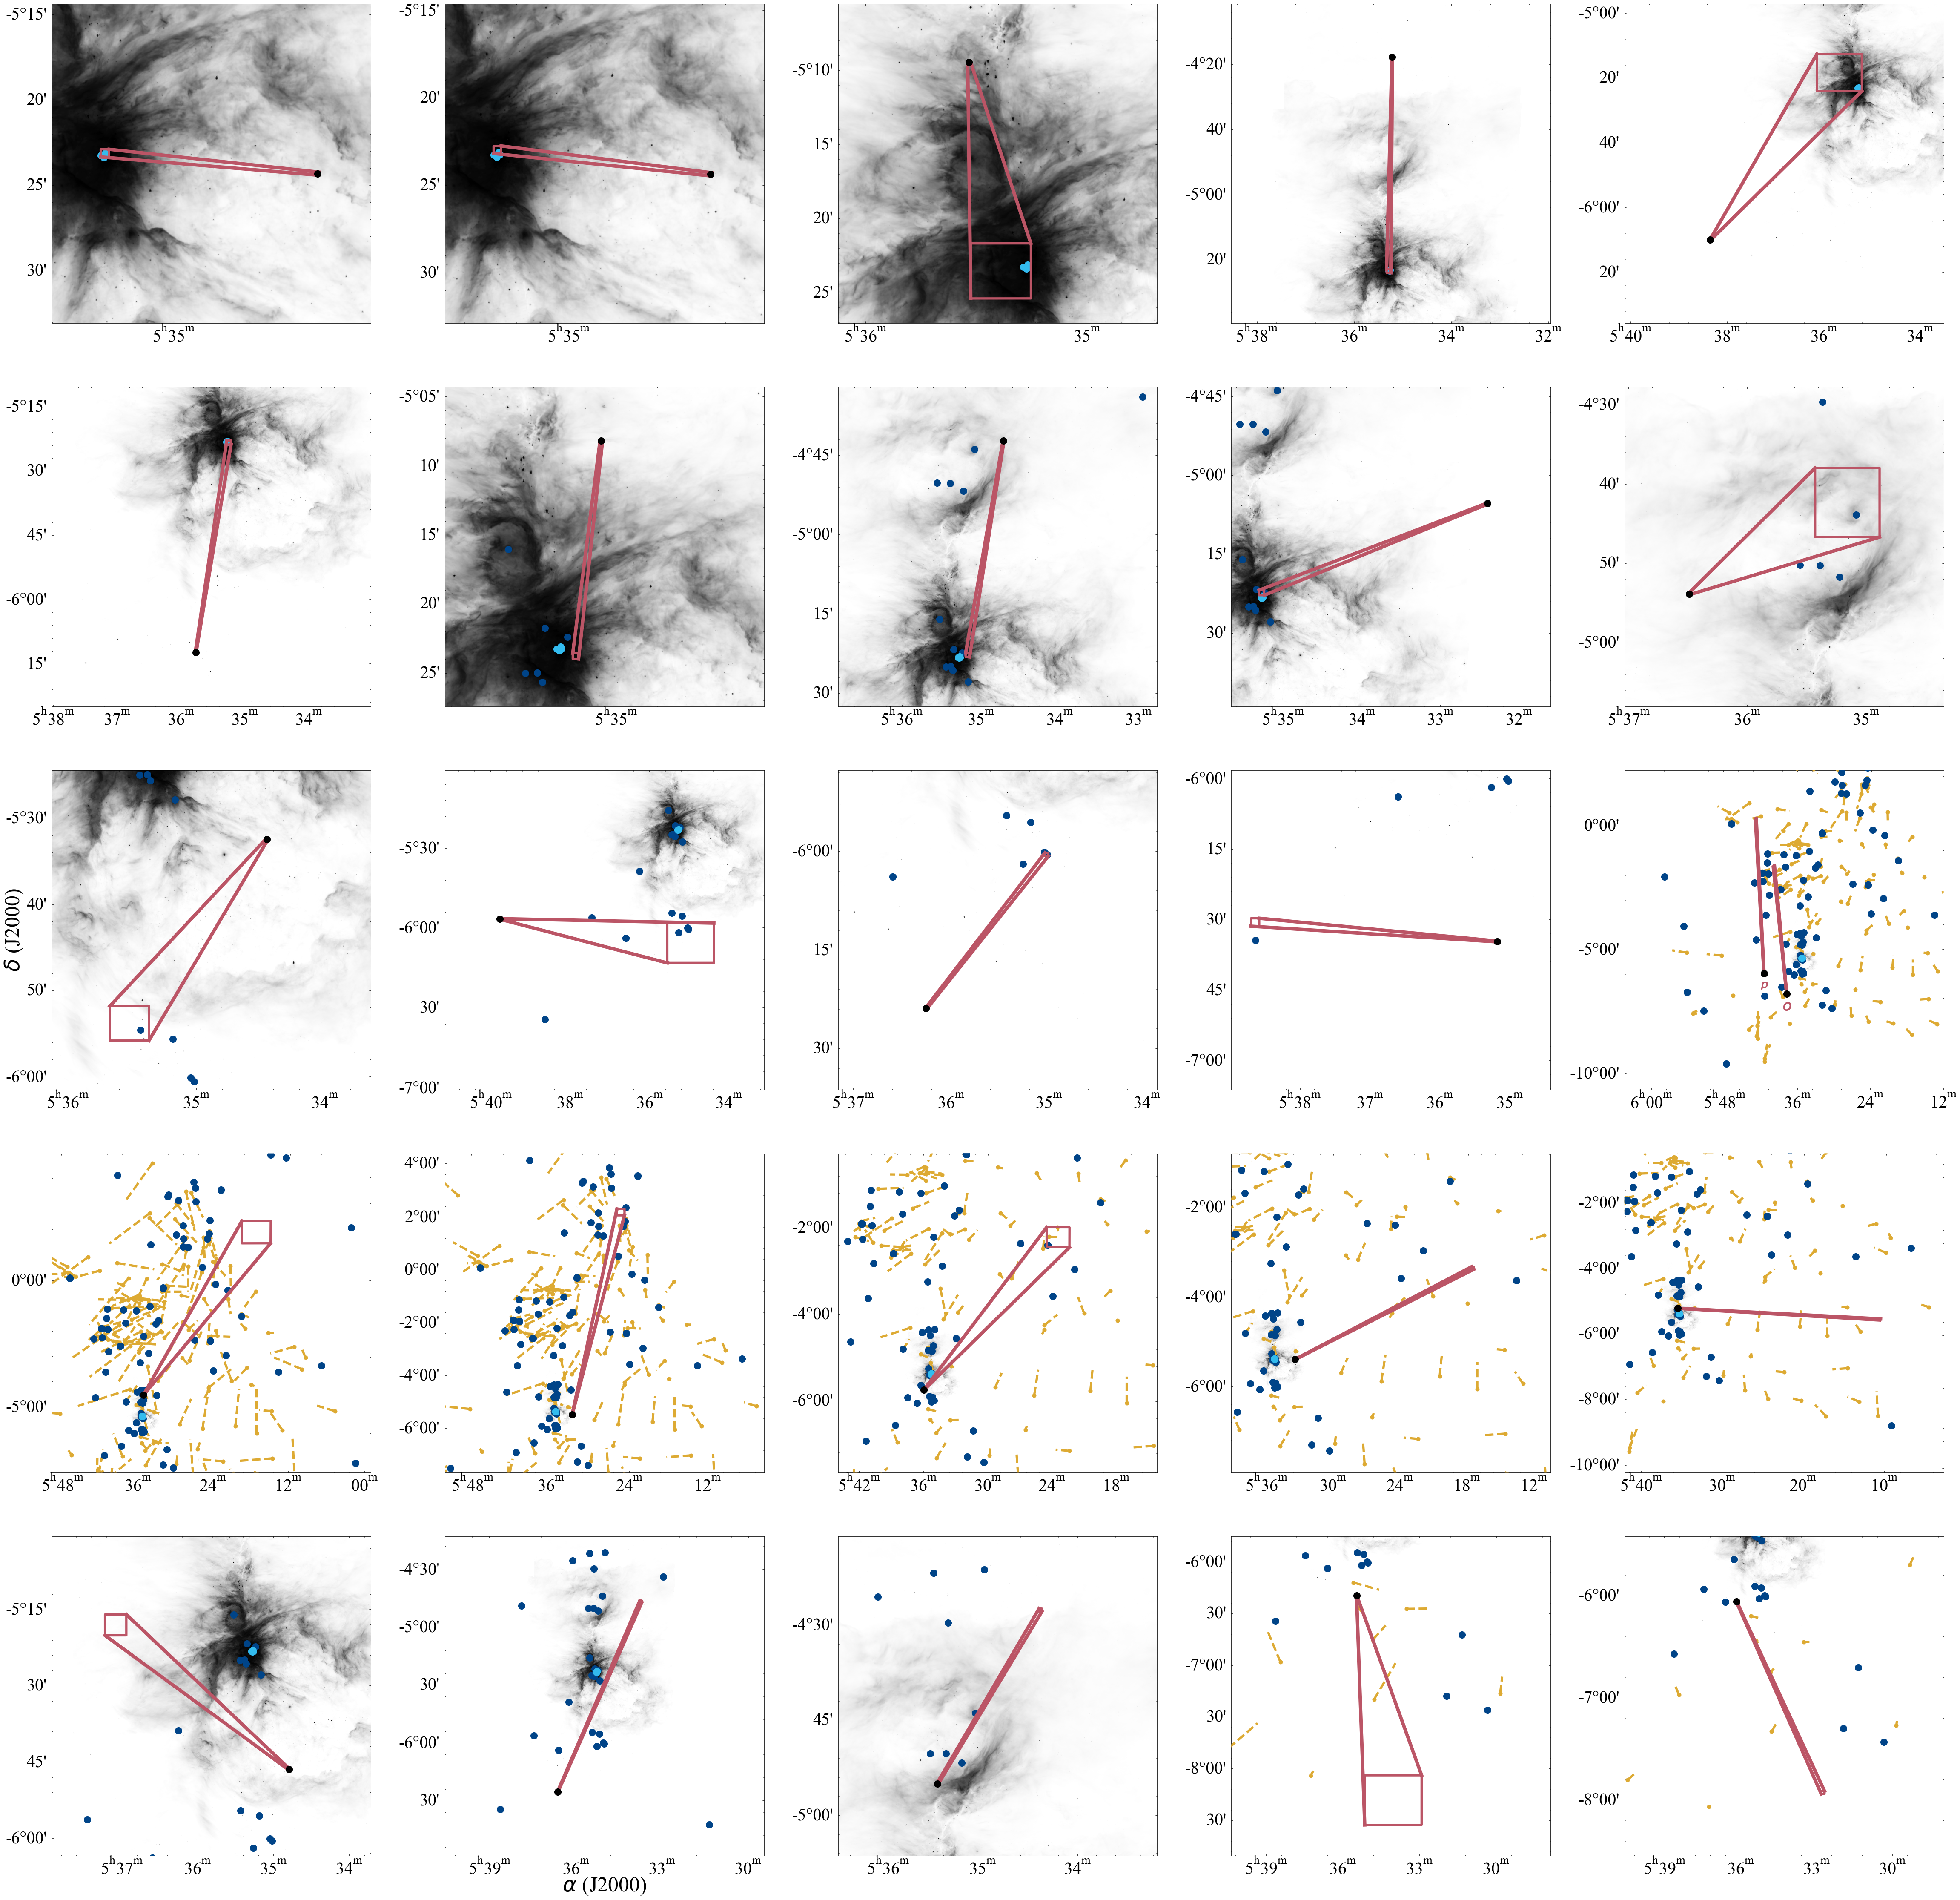

In [53]:
fig

In [54]:
# fig.savefig('c:\\users\\sahal\\desktop\\reorderGRID.jpg', bbox_inches = 'tight')
# fig.savefig('c:\\users\\sahal\\desktop\\research\\figures\\reordergrid.pdf', bbox_inches = 'tight')
# fig.savefig('c:\\users\\sahal\\desktop\\Revised figures\\reordergrid_nolabels.pdf', bbox_inches = 'tight')
# fig.savefig('c:\\users\\sahal\\desktop\\Revised figures\\reordergrid_nolabels.png', bbox_inches = 'tight')
fig.savefig('c:\\users\\sahal\\desktop\\Revised figures\\grid_recolor.eps', bbox_inches = 'tight')

In [27]:
# conePlotTR(wTrap, [thOriA.ra, thOriB.ra, thOriC.ra, thOriD.ra], [thOriA.dec, thOriB.dec, thOriC.dec, thOriD.dec], times = tlist)

# plt.savefig('c:\\users\\sahal\\desktop\\THING.jpg')
plt.show()

<Figure size 432x288 with 0 Axes>

In [ ]:
allFigs

In [ ]:
othertoTrap = wOther['source_id'][1]

In [ ]:
#Work on the table for presentation in the paper

In [ ]:
magsTrap = np.sqrt(wTrap['pmra']**2+wTrap['pmdec']**2)
magsOB = np.sqrt(wOB['pmra']**2+wOB['pmdec']**2)
magsOther=np.sqrt(wOther['pmra']**2+wOther['pmdec']**2)
alpha = np.array(list(string.ascii_lowercase)[0:26])
allPM = np.concatenate([magsTrap, magsOB[otherInds], magsOther])
prlx = np.concatenate([wTrap['parallax'],wOB['parallax'][otherInds], wOther['parallax']])
sourceIDs = np.concatenate([wTrap['source_id'], wOB['source_id'][otherInds], wOther['source_id']])

def masToKms(mag, par):
    pi = par / 1000
    d = 1 / pi
#     print(d)
    pm = mag /1000 / 3.154e+7 #as/s
    radianconvert = np.pi /(180*3600)
    kms = (pm*radianconvert) * d *  3.086e+13 # km/s
    return(kms)

v = masToKms(allPM, prlx)

avgPM = np.mean(np.sqrt(gaiaConfTab['pmra']**2 + gaiaConfTab['pmdec']**2))
avgPRLX = np.mean(np.sqrt(gaiaConfTab['parallax']))
print(masToKms(avgPM, avgPRLX))


labelTab = Table([sourceIDs, alpha, allPM, prlx, v], names = ('id', 'figure', 'pmMag', 'prlx', 'velo'))
labelTab['figure']=np.array(list('abcdefghijklmnopqrstuvzwxy'))
labelTab.show_in_notebook()
# labelTab.write('c:\\users\\sahal\\desktop\\velo.fits')

In [113]:
# m = fits.open('c:\\users\\sahal\\2018trinarywork\\trinarystarsearch\\data\\masterconfirmedtable_1.fits')
# mtab = Table(m[1].data)
# mtab
# mtab.rename_column('RA_1','ra')
# mtab.rename_column('DEC_1','dec')
# mtab.remove_columns(['ra_2', 'dec_2','designation_2','designation_1a','designation_2a','Separation'])
# mtab.rename_column('designation_1', 'designation')
# # mtab# builder = ['']*len(mtab)
# # mtab['figure_label']=np.array(builder)

# mtab.remove_columns(['TrapSource', 'OBSource', 'OtherHighPMSource'])
# mtab.rename_column('Confirmed', 'Confirmed_By')
# mtab.write('c:/users/sahal/desktop/research/figures/tables')

# basis = mtab['source_id']
# for i in range(len(labelTab)):
#     k= labelTab['id'][i]
#     k=np.where(basis == k)[0]
#     let = labelTab['figure'][i]
# #     print(str(let))
#     mtab['figure_label'][k]=str(let)
# #     print(k)

# mtab
# #SAVE THIS

m = fits.open('c:\\users\\sahal\\desktop\\research\\figures\\tables\\masterwsimbad.fits')
mtab = Table(m[1].data)
mtab.remove_columns(['TrapSource', 'OBSource', 'OtherHighPMSource', 'figure_label'])
mtab.write('c:\\users\\sahal\\desktop\\research\\figures\\tables\\nearly_done.fits')

In [ ]:
lets = mtab['figure_label']
interest=np.where(lets!='')[0]
inds=interest[:4]
inds = np.concatenate([inds, np.array([0,5])])
# inds
displaytab = mtab[inds]
# displaytab
displaytab = displaytab['ra', 'dec', 'Confirmed', 'pmra', 'pmdec', 'parallax', 'TrapSource',
    'OBSource','OtherHighPMSource', 'figure_label']
displaytab
# displaytab.write('c:\\users\\sahal\\desktop\\research\\figures\\tables\\displaymaster.fits',
                overwrite=True)
# mtab.write('c:\\users\\sahal\\desktop\\research\\figures\\tables\\master.fits',
#           overwrite=True)

## Make a sample of this table in paper

In [ ]:
gaiaprob = np.where(mtab['source_id']==-9223372036854775808)[0]

In [ ]:
print(np.mean(labelTab['velo']))

In [ ]:
#Make plot of velocity dispersion and outliers

In [ ]:
# params = {
#     'axes.titlesize' : 24,
#     'axes.labelsize' : 30,
#     #lines.linewidth : 3,
#     #lines.markersize : 10,
#     'xtick.labelsize' : 30,
#     'ytick.labelsize' : 30
#    }
# matplotlib.rcParams.update(params)

The draft looks great!
 
There are small things here and there, such as starting to add references, adding more details about the catalog that would be easier for both of us if I were to edit it directly, I think.
 
In terms of the figures, few suggestions:
 
Figure 1:
**I’d change the titles to a “Simulated cluster” and the “ONC” (usually they are added not as a title, but as a text within the bounds of the plot, but it could get messy for the simulated one)
Keep the scale isometric, and have the same range on both plots.
In the simulated data, there is a column YSO with values of 0 for a background star and 1 for a cluster member. It would be good to distinguish them with different colors and/or symbols**. Keep the same color for the real data and the fake cluster, but a different one for the background, and add the same box.
If feasible to use greek letters, **change the axis labels to $\mu_\alpha$ and $\mu_\delta$.** There is also a typo on one of the mas
 
Figure 2
**Change the “Sources Unconstrained” to “Other”; flip the order in the legend, first Trapezium, then OB, then the rest.**
 
Figure 3
The sizes of the panels are good, **but the symbols and the text need to be much bigger, and the lines a point or two thicker. To save a bit of space, the axis labels can be excluded** (may be keeping ra on the bottom row, and dec on the left column).
 
Table
**We can combine the three columns for the high proper motions in the same way that the membership is condensed, just add a label.
The table needs gaia source_id, may be 2mass id as well (make a cross-match in topcat if you don’t have it on hand).**
Add a column for RVs.
There is no need to keep precision in proper motions and parallax for 8 decimal points, could do with just 2, and the uncertainties never go amiss.
 
I should have asked before, but can you check on Parenago 1469, 1724, and 1540. Looking at the plot, I think the first one is part of the pair c/d, the second one is on panel i (could be moved to the Trapezium), and the last one is not there? Did its proper motion not make the cut to fit in the box?

In [114]:
#A really convoluted way of getting all the source labels:
labelstable = Table([SOURCEIDS, LABELS], names = ('source_id', 'figure_label'))
labelstable.write('c:/users/sahal/desktop/research/figures/tables/labelstable.fits', overwrite = True)

In [115]:
print(len(labelstable))

26
